In [ ]:
Feature selection — Selecting the most relevant attributes
Feature extraction  — Combining attributes into a new reduced set of features

# 1.1 Feature Selection



#1.Variance Thresholds
Variance thresholds remove features whose values don't change much from observation to observation
(i.e. their variance falls below a threshold). These features provide little value.

For example, if you had a public health dataset where 96% of observations were for 35-year-old men, 
then the 'Age' and 'Gender' features can be eliminated without a major loss in information.

#2. Correlation Thresholds
Correlation thresholds remove features that are highly correlated with others 
(i.e. its values change very similarly to another's). These features provide redundant information.

# Feature Extraction


Feature extraction is for creating a new, smaller set of features that stills captures most of the 
useful information. Again, feature selection keeps a subset of the original features while feature 
extraction creates new ones.

# PCA



Principal Component Analysis (PCA)
You find that most of the variables are correlated.
PCA is applied on a data set with numeric variables.

1.Principal component analysis (PCA) is an unsupervised algorithm that creates linear combinations of
the original features. The new features are orthogonal, which means that they are uncorrelated. 
Furthermore, they are ranked in order of their "explained variance." The first principal component 
(PC1) explains the most variance in your dataset,
PC2 explains the second-most variance, and so on.

2.You should always normalize your dataset before performing PCA
because the transformation is dependent on scale.
If you don't, the features that are on the largest scale would dominate your new principal components.

First principal component is a linear combination of original predictor variables which captures the maximum variance in the 
data set. 

The first principal component results in a line which is closest to the data i.e. it minimizes the sum of squared distance 
between a data point and the 
line.
Similarly, we can compute the second principal component also.

This suggests the correlation b/w these components in zero.

The directions of these components are identified in an unsupervised way i.e. the response variable(Y) is not used to determine
the component direction. Therefore, it is an unsupervised approach.

#
Why is normalization of variables necessary ?

The principal components are supplied with normalized version of original predictors. This is because, the original predictors
may have different scales. For example: Imagine a data set with variables’ measuring units as gallons, kilometers, light years etc. It is definite that the scale of variances in these variables will be large.

#
Performing PCA on un-normalized variables will lead to insanely large loadings for variables with high variance.
In turn, this will lead to dependence of a principal component on the variable with high variance. This is undesirable.


Standardize the data.

1.Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix,
or perform Singular Vector Decomposition.

2.Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k 
largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d)/.

3.Construct the projection matrix W(size d*k) from the selected k eigenvectors.

4.Transform the original dataset X( size n*d) via W(size d*k) to obtain a k-dimensional feature subspace Y.

 "what is the size of k that represents the data 'well'?"
    
https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

In [16]:
#Code

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)

In [1]:
#from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

NameError: name 'load_iris' is not defined

In [29]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)


What we have done is distill our 4D data set down to 2D, by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection. We can see what those 4D vectors are, although it's not something you can really wrap your head around:

In [43]:
from sklearn.decomposition import PCA
iris=load_iris()
x=iris.data
y=iris.target
for i in range(1,4):
 pca = PCA(n_components=i)
 model = pca.fit(x)
 print(model.transform(x))

[[-2.68420713]
 [-2.71539062]
 [-2.88981954]
 [-2.7464372 ]
 [-2.72859298]
 [-2.27989736]
 [-2.82089068]
 [-2.62648199]
 [-2.88795857]
 [-2.67384469]
 [-2.50652679]
 [-2.61314272]
 [-2.78743398]
 [-3.22520045]
 [-2.64354322]
 [-2.38386932]
 [-2.6225262 ]
 [-2.64832273]
 [-2.19907796]
 [-2.58734619]
 [-2.3105317 ]
 [-2.54323491]
 [-3.21585769]
 [-2.30312854]
 [-2.35617109]
 [-2.50791723]
 [-2.469056  ]
 [-2.56239095]
 [-2.63982127]
 [-2.63284791]
 [-2.58846205]
 [-2.41007734]
 [-2.64763667]
 [-2.59715948]
 [-2.67384469]
 [-2.86699985]
 [-2.62522846]
 [-2.67384469]
 [-2.98184266]
 [-2.59032303]
 [-2.77013891]
 [-2.85221108]
 [-2.99829644]
 [-2.4055141 ]
 [-2.20883295]
 [-2.71566519]
 [-2.53757337]
 [-2.8403213 ]
 [-2.54268576]
 [-2.70391231]
 [ 1.28479459]
 [ 0.93241075]
 [ 1.46406132]
 [ 0.18096721]
 [ 1.08713449]
 [ 0.64043675]
 [ 1.09522371]
 [-0.75146714]
 [ 1.04329778]
 [-0.01019007]
 [-0.5110862 ]
 [ 0.51109806]
 [ 0.26233576]
 [ 0.98404455]
 [-0.174864  ]
 [ 0.92757294]
 [ 0.65959

In [44]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[ 0.92461621  0.05301557  0.01718514]
0.99481691455


# LDA

Although it might sound intuitive that LDA is superior to PCA for a multi-class
classification task where the class labels are known, this might not always the case.
For example, comparisons between classification accuracies for image recognition after using PCA or
LDA show that PCA tends to outperform LDA if the number of samples per class is relatively 
small  In practice, it is also not uncommon to use 
both LDA and PCA in combination: E.g., PCA for dimensionality reduction followed by an LDA.

class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver=’svd’, shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)

The default solver is ‘svd’. It can perform both classification and transform, and it does not rely on the calculation of the covariance matrix. This can be an advantage in situations where the number of features is large. However, the ‘svd’ solver cannot be used with shrinkage.

The ‘lsqr’ solver is an efficient algorithm that only works for classification. It supports shrinkage.

The ‘eigen’ solver is based on the optimization of the between class scatter to within class scatter ratio. It can be used for both classification and transform, and it supports shrinkage.
However, the ‘eigen’ solver needs to compute the covariance matrix, so it might not be suitable for situations with a high number of features.

# solver : 
string, optional

Solver to use, possible values:
‘svd’: Singular value decomposition (default). Does not compute the covariance matrix, therefore this solver is recommended for data with a large number of features.
‘lsqr’: Least squares solution, can be combined with shrinkage.
‘eigen’: Eigenvalue decomposition, can be combined with shrinkage.
shrinkage : string or float, optional

# Shrinkage parameter, possible values:
None: no shrinkage (default).
‘auto’: automatic shrinkage using the Ledoit-Wolf lemma.
float between 0 and 1: fixed shrinkage parameter.
Note that shrinkage works only with ‘lsqr’ and ‘eigen’ solvers.

# n_components : int, optional

Number of components (< n_classes - 1) for dimensionality reduction.

In [18]:
>>> import numpy as np
>>> from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
>>> X = np.array([[-1, -1,1], [-2, -1,2], [-3, -2,1], [1, 1,1], [2, 1,1], [3, 2,9]])
>>> y = np.array([1, 1, 1, 2, 2, 2])
>>> clf = LinearDiscriminantAnalysis()
>>> clf.fit(X, y)
LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
>>> print(clf.predict([[-0.8, -1,7]]))
clf.coef_
clf.explained_variance_ratio_



[1]


array([ 1.])

In [55]:
from sklearn.lda import LDA
iris = load_iris()
x = iris.data
y=iris.target

for i in range(1,6):
       lda = LDA(n_components=i)
       model = lda.fit(x,y)
       #print(i)
       print(model.transform(x))
       print(model.predict(x))
#This is the relevant, dimension-reducing line of LDA.transform, it uses scalings_. As described in the docstring, scalings_ has
#maximally n_classes - 1 columns. This is then the maximal number of columns you can hope to obtain using transform.
# In your case, 2 classes (True, False), yields maximally 1 column.



[[-8.0849532 ]
 [-7.1471629 ]
 [-7.51137789]
 [-6.83767561]
 [-8.15781367]
 [-7.72363087]
 [-7.23514662]
 [-7.62974497]
 [-6.58274132]
 [-7.36884116]
 [-8.42181434]
 [-7.24739721]
 [-7.35062105]
 [-7.59646896]
 [-9.86936588]
 [-9.18033614]
 [-8.59760709]
 [-7.7995682 ]
 [-8.1000091 ]
 [-8.04543611]
 [-7.52046427]
 [-7.60526378]
 [-8.70408249]
 [-6.26374139]
 [-6.59191505]
 [-6.79210164]
 [-6.84048091]
 [-7.948386  ]
 [-8.01209273]
 [-6.85589572]
 [-6.78303525]
 [-7.38668238]
 [-9.16249492]
 [-9.49617185]
 [-7.36884116]
 [-7.9756525 ]
 [-8.63115466]
 [-7.36884116]
 [-6.95602269]
 [-7.71167183]
 [-7.9361354 ]
 [-5.6690533 ]
 [-7.26559733]
 [-6.42449823]
 [-6.88607488]
 [-6.77985104]
 [-8.11232705]
 [-7.21095698]
 [-8.33988749]
 [-7.69345171]
 [ 1.45772244]
 [ 1.79768044]
 [ 2.41680973]
 [ 2.26486771]
 [ 2.55339693]
 [ 2.41954768]
 [ 2.44719309]
 [ 0.2160281 ]
 [ 1.74591275]
 [ 1.95838993]
 [ 1.19023864]
 [ 1.86140718]
 [ 1.15386577]
 [ 2.65942607]
 [ 0.38024071]
 [ 1.20280815]
 [ 2.76266

Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis (LDA) method used to find a linear combination of features that characterizes or separates classes. The resulting combination is used for dimensionality reduction before classification.

Though PCA (unsupervised) attempts to find the orthogonal component axes of maximum variance in a dataset, however, the goal of LDA (supervised) is to find the feature subspace that optimizes class separability.

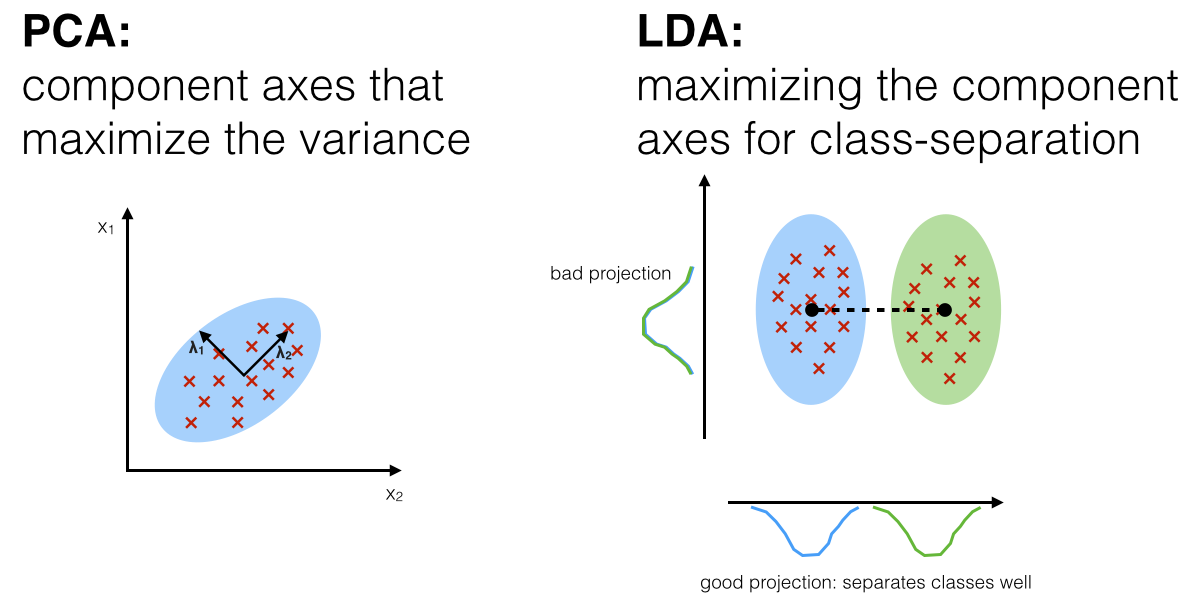

PCA is used as a technique for finding the directions of maximal variance while LDA used as a technique that also cares about class separability (note that, as we can see from the picture, LD2 (y-axis, bad projection) would be a very bad linear discriminant) - What is the difference between LDA and PCA for dimension reduction?